# Project description
You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides. Working with a database, you'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.

## Exploratory data analysis (Python)

In addition to the data you retrieved in the previous tasks, you've been given a second file. You now have these two CSVs:

project_sql_result_01.csv. It contains the following data:
 - `'company_name'`: taxi company name
 - `'trips_amount'`: the number of rides for each taxi company on November 15-16, 2017.

project_sql_result_04.csv. It contains the following data:
 - `'dropoff_location_name'`: Chicago neighborhoods where rides ended
 - `'average_trips'`: the average number of rides that ended in each neighborhood in November 2017.


### For these two datasets you now need to:
- import the files
- study the data they contain
- make sure the data types are correct
- identify the top 10 neighborhoods in terms of drop-offs
- make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
- draw conclusions based on each graph and explain the results

In [1]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# importing the files
df_query1 = pd.read_csv('/datasets/project_sql_result_01.csv')
df_query4 = pd.read_csv('/datasets/project_sql_result_04.csv')

In [3]:
# first look at df_query1
display(df_query1.head())
display(df_query1.info())
display(df_query1.describe())

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [4]:
# first look at df_query4
display(df_query4.head())
display(df_query4.info())
display(df_query4.describe())

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


With both files the data types are correct and we do not have any missing values. Now let's move on to analyzing the data.

In [5]:
# identify the top 10 neighborhoods in terms of drop-offs
top10_nbhds = df_query4.groupby(
    'dropoff_location_name')['average_trips'].max().sort_values(ascending = False).head(10)
display(top10_nbhds)

dropoff_location_name
Loop                  10727.466667
River North            9523.666667
Streeterville          6664.666667
West Loop              5163.666667
O'Hare                 2546.900000
Lake View              2420.966667
Grant Park             2068.533333
Museum Campus          1510.000000
Gold Coast             1364.233333
Sheffield & DePaul     1259.766667
Name: average_trips, dtype: float64

company_name
Flash Cab                            19558
Taxi Affiliation Services            11422
Medallion Leasing                    10367
Yellow Cab                            9888
Taxi Affiliation Service Yellow       9299
Chicago Carriage Cab Corp             9181
City Service                          8448
Sun Taxi                              7701
Star North Management LLC             7455
Blue Ribbon Taxi Association Inc.     5953
Name: trips_amount, dtype: int64

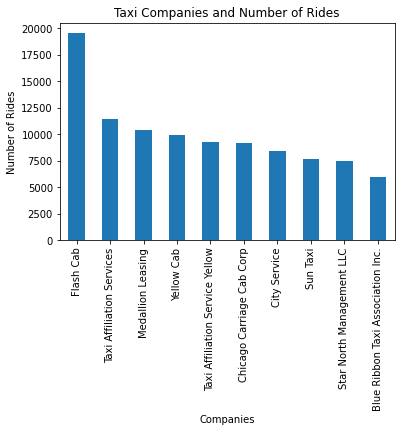

In [6]:
# make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
# draw conclusions based on each graph and explain the results

top10_companies = df_query1.groupby(
    'company_name')['trips_amount'].max().sort_values(ascending = False).head(10)
display(top10_companies)
top10_companies.plot(x='company_name', kind='bar', 
                     title = 'Taxi Companies and Number of Rides', xlabel='Companies',
                     ylabel='Number of Rides')

plt.show() 


Looking at this graph of the top ten companies based on the trip amount, we can see that Flash Cab is the leading company by over 8,000. After this large jump from the Flash Cab to Taxi Affiliation Services, the trip amount decreases less significantly between the rest of the top ten companies.

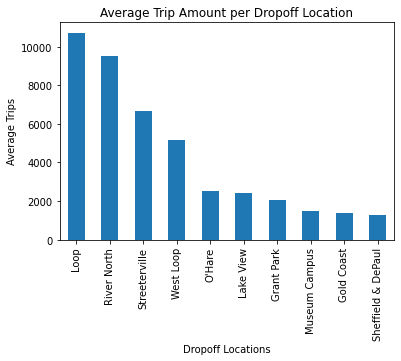

In [7]:
top10_nbhds.plot(x='dropoff_location_name', kind='bar', title = 'Average Trip Amount per Dropoff Location', xlabel='Dropoff Locations',
        ylabel='Average Trips')

plt.show() 

Our graph of the average trip amount per dropoff location shows that Loop is the most popular dropoff location. The average trip amount for the bottom three of the top ten dropoff locations are very similar.

## Testing hypotheses (Python)
project_sql_result_07.csv — the result of the last query. It contains data on rides from the Loop to O'Hare International Airport. 

Remember, these are the table's field values:
 - `'start_ts'` — pickup date and time
 - `'weather_conditions'` — weather conditions at the moment the ride started
 - `'duration_seconds'` — ride duration in seconds
 
Test the hypothesis:
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

Set the significance level (alpha) value on your own.
Explain:
 - how you formed the null and alternative hypotheses
 - what criterion you used to test the hypotheses and why


In [8]:
df_query7 = pd.read_csv('/datasets/project_sql_result_07.csv')

In [9]:
display(df_query7.head())
display(df_query7.info())
display(df_query7.describe())

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


There are no missing values, but we need to change `'start_ts'` to datetime data type.

In [10]:
# changing start_ts to datetime data type

df_query7['start_ts'] = pd.to_datetime(df_query7['start_ts'], format = '%Y-%m-%d %H:%M:%S')

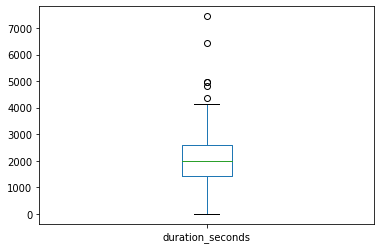

count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

In [11]:
df_query7['duration_seconds'].plot(kind = 'box')
plt.show()

display(df_query7['duration_seconds'].describe())

There a few outliers in the `'duration_seconds'` column. The median is 1980 seconds with the majority being under 4500 seconds.

In [12]:
# creating variables for good weather and bad weather on saturdays

sat_bad_rides = df_query7[(df_query7["start_ts"].dt.weekday == 5) & (
    df_query7["weather_conditions"] != "Good")]["duration_seconds"].values
sat_good_rides = df_query7[(df_query7["start_ts"].dt.weekday == 5) & (
    df_query7["weather_conditions"] == "Good")]["duration_seconds"].values

In [13]:
display(len(sat_bad_rides))
display(len(sat_good_rides))

180

888

In [14]:
# setting the null and alternative hypotheses

H0 = "The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays"
H1 = "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays"

In [15]:
alpha = 0.05
results = st.ttest_ind(sat_bad_rides, sat_good_rides)

print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print(H1)
else:
    print(H0)

p-value: 6.517970327099473e-12
The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays


After testing the hypothesis we can see that the average duartion of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

## General Conclusion

 - Looking at the top ten companies based on the trip amount, we can see that Flash Cab is the leading company by over 8,000. After this large jump from the Flash Cab to Taxi Affiliation Services, the trip amount decreases less significantly between the rest of the top ten companies.
 - Our graph of the average trip amount per dropoff location shows that Loop is the most popular dropoff location. The average trip amount for the bottom three of the top ten dropoff locations are very similar.
 - After testing the hypothesis we can see that the average duartion of rides from the Loop to O'Hare International Airport changes on rainy Saturdays
